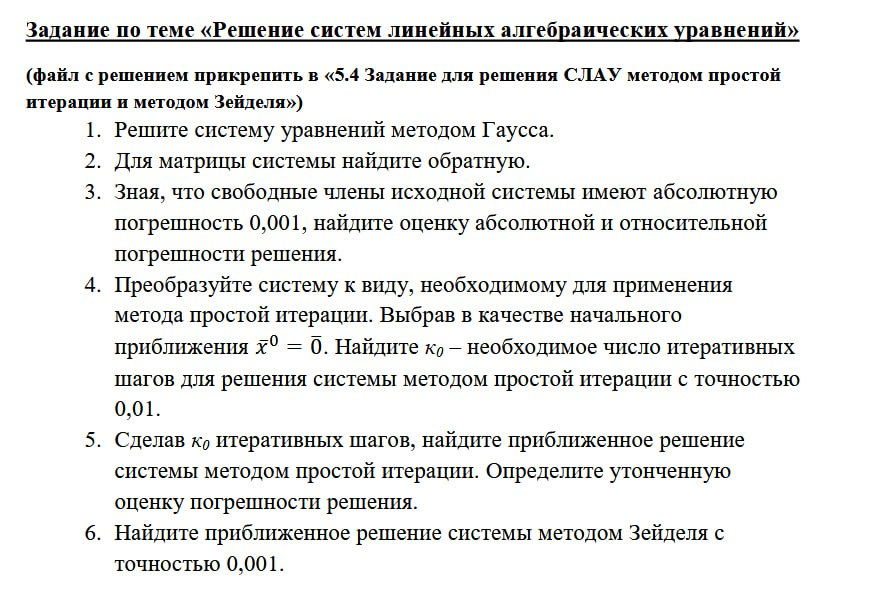
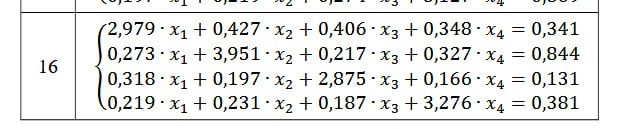

Приведем систему A к виду, где диагональные элементы имеют коэффициент 1:

In [13]:
def div_main_diag(row, ind):
    return [(row[i] / row[ind]) for i in range(len(row))]

def gen_matrix_remaining_X(row):
    new_matrix = []
    
    for i in range(len(row) - 1):
        if row[i] == 1.0:
            new_matrix.append(0)
        else:
            new_matrix.append(row[i] * (-1))
    return new_matrix
    

# Главная матрица
A = [
    [2.979, 0.427, 0.406, 0.348, 0.341],
    [0.273, 3.951, 0.217, 0.327, 0.844],
    [0.318, 0.197, 2.875, 0.166, 0.131],
    [0.219, 0.231, 0.187, 3.276, 0.381],
]

diag_A = []
ind = 0

# Делим строку на коэффициент перед x, где порядковый номер равен номеру строки
for row in A:
    diag_A.append(div_main_diag(row, ind))
    ind += 1

# Вводим необходимые матрицы
X = [1.0, 1.0, 1.0, 1.0]
C = [row[-1] for row in diag_A]
B = [gen_matrix_remaining_X(row) for row in diag_A]

Найдем норму матрицы B и проверяем условие сходимости:

In [7]:
norma_B = max([abs(sum(row)) for row in B])

if norma_B < 1:
    print('Условие сходимости выполняется!')
else:
    print('Условие сходимости НЕ выполняется!')

Условие сходимости выполняется!


Найдем необходимо число итерации при помощи неравенства:

1. 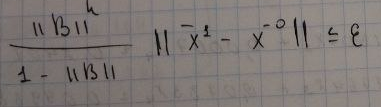

т.к. x0 = 0, то ||x1-x0|| = ||c||

In [27]:
import math

E = 0.01

norma_C = max(C)

k = math.log((E * (1 - norma_B) / norma_C)) / math.log(norma_B)
print(f'Итого, необходимое количество шагов k = {round(k)}')

Итого, необходимое количество шагов k = 4


Далее сделаем k шагов для решения системы методом простой итерации. Формула шагов:

2. 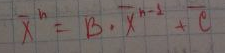

In [64]:
import numpy as np

x0 = 0

X_N = [np.array(C), 0, 0, 0]

for n in range(1, int(k) + 1):
    X_N[n] = (np.array(B) * X_N[n - 1] + np.array(C))

for i in range(len(X_N)):
    print(f'x{i} = {X_N[i]}\n')

x0 = [0.11446794 0.21361681 0.04556522 0.11630037]

x1 = [[0.11446794 0.18299768 0.03935525 0.10271442]
 [0.10655862 0.21361681 0.04306265 0.1066749 ]
 [0.10180679 0.19897941 0.04556522 0.10958528]
 [0.10681578 0.19855408 0.04296427 0.11630037]]

x2 = [[0.11446794 0.18738652 0.04020159 0.1043015 ]
 [0.10710512 0.21361681 0.0432001  0.10747154]
 [0.10320723 0.19998239 0.04556522 0.10997301]
 [0.10732733 0.1996162  0.04311274 0.11630037]]

x3 = [[0.11446794 0.18675744 0.04008625 0.1041161 ]
 [0.10706736 0.21361681 0.04319255 0.10740561]
 [0.10305233 0.19991366 0.04556522 0.10995062]
 [0.10729313 0.1995413  0.04310426 0.11630037]]



Определим утонченную оценку погрешности решения по формуле:

3. 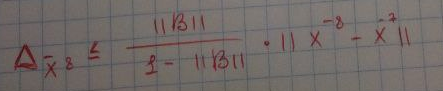

In [72]:
XX = X_N[3] - X_N[2]

norma_XX = max([abs(sum(row)) for row in XX])

del_x4 = (norma_B / (1 - norma_B)) * norma_XX

print(f'Утонченная оценка погрешности решения = {del_x4}')

Утонченная оценка погрешности решения = 0.0006107482363138713
